# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# План работ:
- Шаг 1. Откройть файл с данными и изучить общую информацию.
- Шаг 2. Предобработка данных - обработка пропусков, аномалий и дубликатов.
- Шаг 3. Добавить в таблицу новые столбцы, которые пригодятся для следующего анализа даннах.
- Шаг 4. Провести исследовательский анализ данных - изучить разные параметры объектов.
- Шаг 5. Зафиксировать основной вывод проведённого исследования.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию." data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-долю-пропущенных-значений-в-столбцах" data-toc-modified-id="Посмотрим-на-долю-пропущенных-значений-в-столбцах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на долю пропущенных значений в столбцах</a></span></li><li><span><a href="#Обработаем-пропуски-и-аномалии-в-столбцах" data-toc-modified-id="Обработаем-пропуски-и-аномалии-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработаем пропуски и аномалии в столбцах</a></span></li></ul></li><li><span><a href="#Расчитаем-и-добавим-в-таблицу-новые-столбцы" data-toc-modified-id="Расчитаем-и-добавим-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчитаем и добавим в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Столбец-с-ценой-за-1кв-метр" data-toc-modified-id="Столбец-с-ценой-за-1кв-метр-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Столбец с ценой за 1кв метр</a></span></li><li><span><a href="#Столбец-с-днем-недели" data-toc-modified-id="Столбец-с-днем-недели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Столбец с днем недели</a></span></li><li><span><a href="#Столбец-с-месяцем" data-toc-modified-id="Столбец-с-месяцем-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Столбец с месяцем</a></span></li><li><span><a href="#Столбец-с-годом" data-toc-modified-id="Столбец-с-годом-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Столбец с годом</a></span></li><li><span><a href="#Столбец-с-этажностью-объекта" data-toc-modified-id="Столбец-с-этажностью-объекта-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Столбец с этажностью объекта</a></span></li><li><span><a href="#Столбец-с-расстоянием-до-центра-города-в-км" data-toc-modified-id="Столбец-с-расстоянием-до-центра-города-в-км-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Столбец с расстоянием до центра города в км</a></span></li></ul></li><li><span><a href="#Проведим-исследовательский-анализ-данных" data-toc-modified-id="Проведим-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведим исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим--параметры-объектов:" data-toc-modified-id="Изучим--параметры-объектов:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим  параметры объектов:</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь:" data-toc-modified-id="Общая-площадь:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь:</a></span></li><li><span><a href="#Жилая-площадь:" data-toc-modified-id="Жилая-площадь:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Жилая площадь:</a></span></li><li><span><a href="#Площадь-кухни:" data-toc-modified-id="Площадь-кухни:-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Площадь кухни:</a></span></li><li><span><a href="#Цена-объектов:" data-toc-modified-id="Цена-объектов:-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Цена объектов:</a></span></li><li><span><a href="#Количество-комнат:" data-toc-modified-id="Количество-комнат:-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Количество комнат:</a></span></li><li><span><a href="#Высота-потолков:" data-toc-modified-id="Высота-потолков:-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Высота потолков:</a></span></li><li><span><a href="#Этажность-объектов:" data-toc-modified-id="Этажность-объектов:-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Этажность объектов:</a></span></li><li><span><a href="#Тип-этажа-объектов:" data-toc-modified-id="Тип-этажа-объектов:-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Тип этажа объектов:</a></span></li><li><span><a href="#Общее-количество-этажей-объектов:" data-toc-modified-id="Общее-количество-этажей-объектов:-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Общее количество этажей объектов:</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах:" data-toc-modified-id="Расстояние-до-центра-города-в-метрах:-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах:</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта:" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта:-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта:</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка:" data-toc-modified-id="Расстояние-до-ближайшего-парка:-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка:</a></span></li><li><span><a href="#День-публикации-объявления:" data-toc-modified-id="День-публикации-объявления:-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span>День публикации объявления:</a></span></li><li><span><a href="#Месяц-публикации-объявления:" data-toc-modified-id="Месяц-публикации-объявления:-4.1.14"><span class="toc-item-num">4.1.14&nbsp;&nbsp;</span>Месяц публикации объявления:</a></span></li></ul></li><li><span><a href="#Изучим,-как-быстро-продавались-квартиры." data-toc-modified-id="Изучим,-как-быстро-продавались-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим, как быстро продавались квартиры.</a></span></li><li><span><a href="#Проверим-какие-факторы-больше-всего-влияют-на-полную-стоимость-объекта." data-toc-modified-id="Проверим-какие-факторы-больше-всего-влияют-на-полную-стоимость-объекта.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверим какие факторы больше всего влияют на полную стоимость объекта.</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-общей-площади-объекта" data-toc-modified-id="Зависимость-цены-от-общей-площади-объекта-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Зависимость цены от общей площади объекта</a></span></li><li><span><a href="#Зависимость-цены-от-жилой-площади-объекта" data-toc-modified-id="Зависимость-цены-от-жилой-площади-объекта-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Зависимость цены от жилой площади объекта</a></span></li><li><span><a href="#Зависимость-цены-от-площади-кухни-объекта" data-toc-modified-id="Зависимость-цены-от-площади-кухни-объекта-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Зависимость цены от площади кухни объекта</a></span></li><li><span><a href="#Зависимость-цены-от-кол-ва-комнат-объекта" data-toc-modified-id="Зависимость-цены-от-кол-ва-комнат-объекта-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Зависимость цены от кол-ва комнат объекта</a></span></li><li><span><a href="#Зависимость-цены-от-этажа-объекта" data-toc-modified-id="Зависимость-цены-от-этажа-объекта-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Зависимость цены от этажа объекта</a></span></li><li><span><a href="#Зависимость-цены-от-дня-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-дня-размещения-объявления-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Зависимость цены от дня размещения объявления</a></span></li><li><span><a href="#Зависимость-цены-от-месяца-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-месяца-размещения-объявления-4.3.7"><span class="toc-item-num">4.3.7&nbsp;&nbsp;</span>Зависимость цены от месяца размещения объявления</a></span></li><li><span><a href="#Зависимость-цены-от-года-размещения-объявления" data-toc-modified-id="Зависимость-цены-от-года-размещения-объявления-4.3.8"><span class="toc-item-num">4.3.8&nbsp;&nbsp;</span>Зависимость цены от года размещения объявления</a></span></li></ul></li><li><span><a href="#Расчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений." data-toc-modified-id="Расчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</a></span></li><li><span><a href="#Рассмотрим-стоимость-объектов-по-удаленности-от-центра-города." data-toc-modified-id="Рассмотрим-стоимость-объектов-по-удаленности-от-центра-города.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Рассмотрим стоимость объектов по удаленности от центра города.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Откроем файл с данными и изучим общую информацию. 

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# считываем csv-файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# вывод первых 10-ти строк
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# просмотр информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

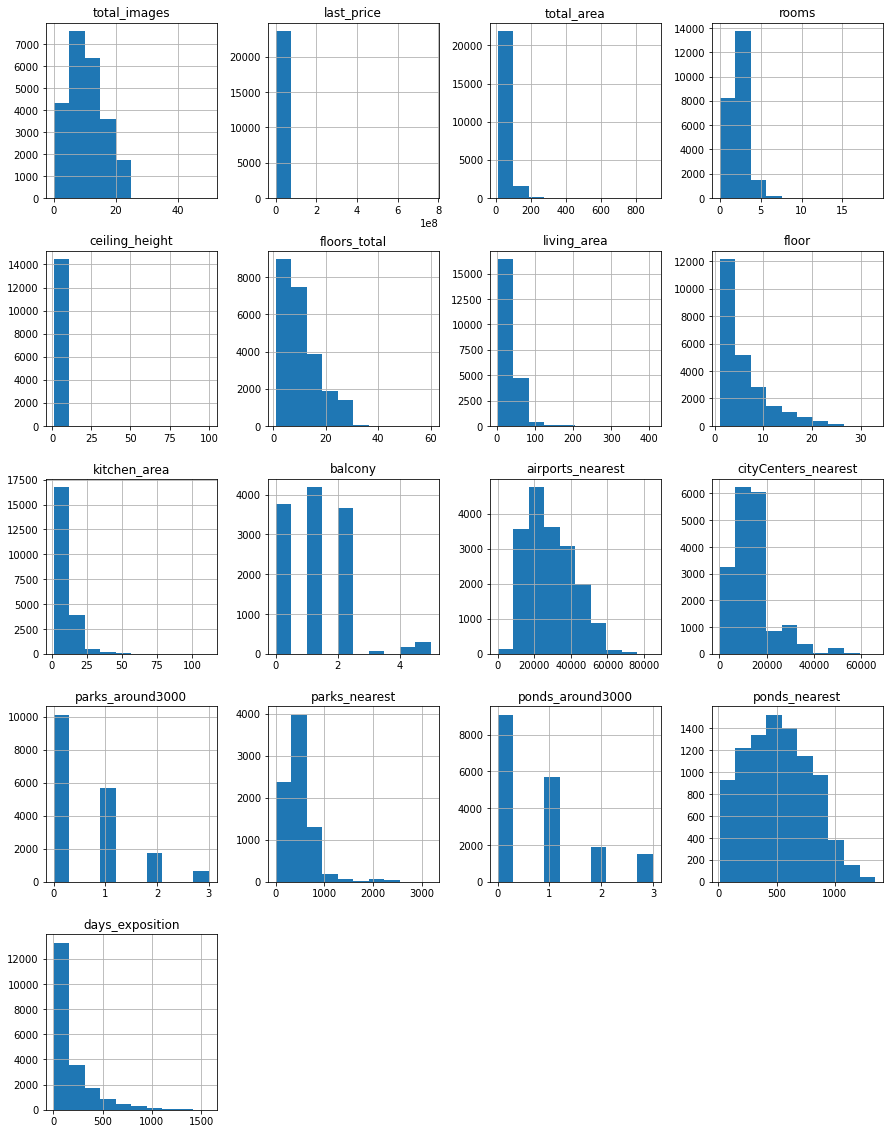

In [5]:
#общая гистограмма для всех числовых столбцов
data.hist(figsize=(15, 20));

**Вывод:** В полученных данных присутсвуют пропуски и аномалии. Так как датафрейм состоит из двух частей добавленных пользователем и автоматически рассчитанных по картам, можно предположить, что пропуски могли возникнуть по причине ошибок пользователей, сбоев автоматичекой обработки по картам и ошибок при выгрузке данных. Рассмотрим их более детально в следующей части проекта.

## Предобработка данных

### Посмотрим на долю пропущенных значений в столбцах

In [6]:
pd.DataFrame(round(data.isnull().mean().sort_values(ascending= False)*100, 1)).style.background_gradient('Reds')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
cityCenters_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


Пропуски в следующих столбцах и заметки по ним:
- is_apartment             - самый большой процент пропусков, возможно новый/необязательный/не проставленный параметр
- parks_nearest            - расстояние до ближайших парков много где не указано 
- ponds_nearest            - расстояние до ближайших водоемов тоже много где не указано 
- balcony                  - не указано колличество балконов
- ceiling_height           - не указана высота потолков
- airports_nearest         - не указано расстояние до ближайших аэропортов
- cityCenters_nearest      - не указано растояние до центра города
- ponds_around3000         - не указано колличество водоемов по близости
- parks_around3000         - не указано колличество парков по близости
- days_exposition          - нет колличества дней объявления
- kitchen_area             - не указана площадь кухни
- living_area              - не указана жилая площадь
- floors_total             - не везде есть общее колличество этажей
- locality_name            - не указан населенный пункт

В столбцах показывающих близлежащие достопримечательности пропуски можно было бы заполнить по карте, но это слишком долго. Далее для удобства будем просматривать каждый столбец отдельно и подготавливать дынне в них. 


### Обработаем пропуски и аномалии в столбцах

In [7]:
# Создадим функцию для описания данных в столбце
def column_report(column_name,box=True):
    print('Nan %',data[column_name].isnull().mean()*100)
    print(data[column_name].describe())
    if box != False:
        pd.DataFrame(data[column_name]).boxplot(vert=False,figsize=(15,5));    

Первым по колличеству пропусков идет столбец is_apartment, посмотрим на него с помощью созданной функции:

In [8]:
column_report('is_apartment',False)

Nan % 88.2906451749019
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


В столбце почти 90% пропусков, много но заполнять на 0 не совсем правильно, поэтому просто изменим тип данных на bool:

In [9]:
data['is_apartment'] = data['is_apartment'].astype('bool')
column_report('is_apartment',False)

Nan % 0.0
count     23699
unique        2
top        True
freq      20974
Name: is_apartment, dtype: object


Далее столбец с расстояниями до ближайших парков парков:

Nan % 65.90995400649817
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


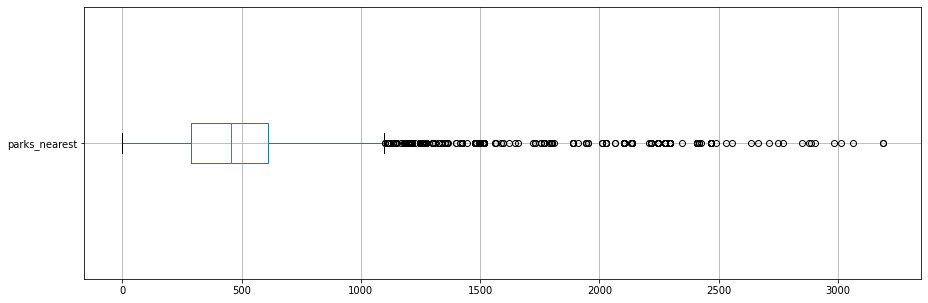

In [10]:
# parks_nearest
column_report('parks_nearest')

Есть пропуски, но они не мешают дальнейшему анализу, оставим как есть. Возможно, если не указано расстояние до парка, то, скорее всего, парк не близко.

Далее посмотрим на ближайшие водоемы:

Nan % 61.55955947508333
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


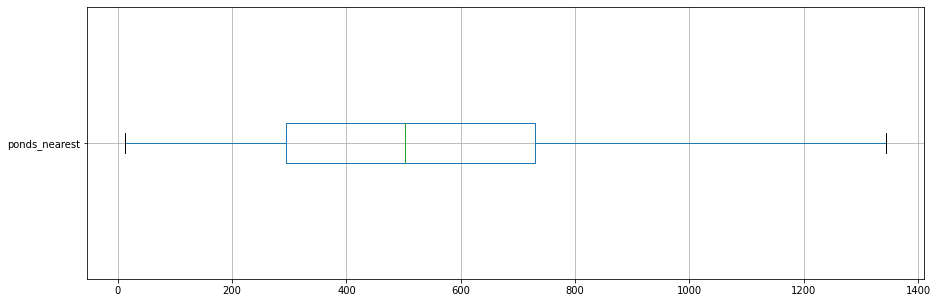

In [11]:
# ponds_nearest
column_report('ponds_nearest')

Как и в парках есть пропуски, но они не мешают дальнейшему анализу, оставим как есть. Если не указано расстояние до водоема, то, скорее всего, его и нет.

Далее посмторим на данные по балконам:

Nan % 48.605426389299126
count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


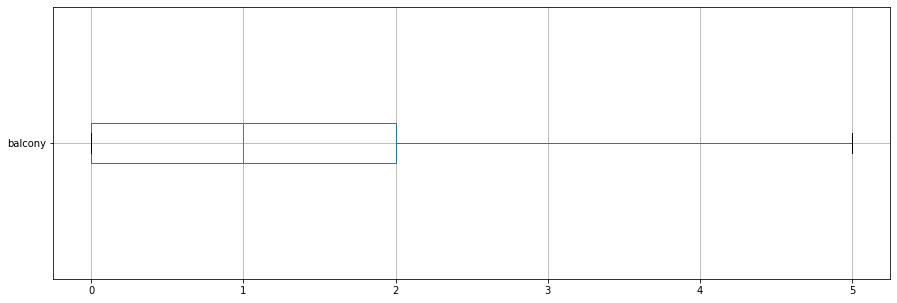

In [12]:
# balcony
column_report('balcony')

Почти 50% пропусков тоже много и тип данных не целый. Балконы либо есть либо нет, поэтому там где они не указаны предположим что они равны 0. А еще половинки балкона также быть не может, поэтому заменим тип на целый:

Nan % 0.0
count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


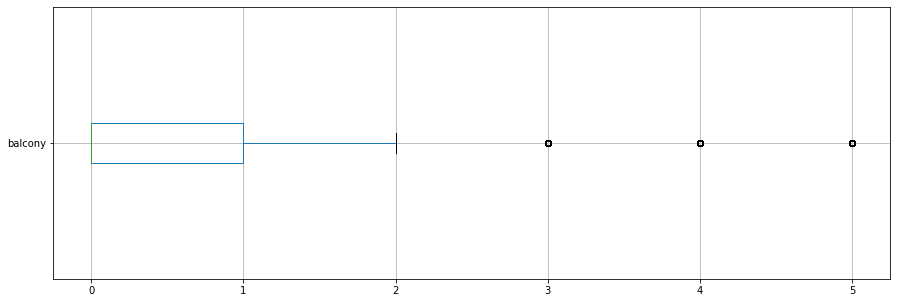

In [13]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
column_report('balcony')

Сложно поверить в существование квартир с более чем 3мя балконами, проверим на всякий случай сколько таких:

In [14]:
data.loc[ data['balcony'] >=3,'balcony'].count()

568

Не очень много, идем дальше. Посмотрим на высоту потолков:

Nan % 38.799105447487236
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


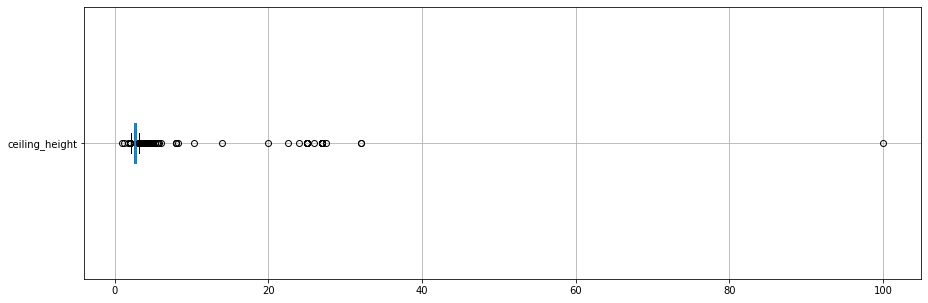

In [15]:
# ceiling_height
column_report('ceiling_height')

Почти 40% пропусков. Посмотрим еще на уникальные значения потолков:

In [16]:
#проверим уникальные значения столбца с высотой потолков
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Похоже в некоторых данных смещена десятичная часть - для начала исправим этот момент. Так как минимально допустимой нормой считаются потолки 2.4 м, сдвинем запятую у всех значений больше 24: 


In [17]:
data.loc[ data['ceiling_height'] >=24,'ceiling_height'] = data['ceiling_height'] / 10

А теперь заполним пропуски медианным значением и посмотрим на столбец снова:

Nan % 0.0
count    23699.000000
mean         2.700338
std          0.305658
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64


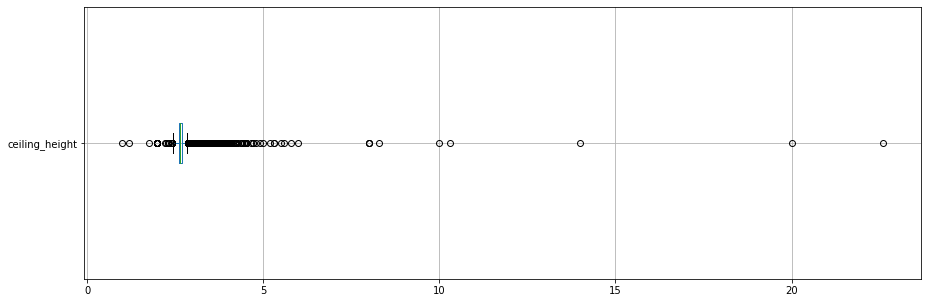

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median(skipna=True))
column_report('ceiling_height')

Остались аномальные значения, например меньше 2.4 м и свыше 6м. Проверим насколько их много:

In [19]:
anomaly_ceiling_height = data.loc[ ((data['ceiling_height']>=6) | (data['ceiling_height']<2.4)),'ceiling_height' ]
print(anomaly_ceiling_height.count())

31


Всего 31 строка с аномалиями, думаю их можно убрать:

In [20]:
data.drop(anomaly_ceiling_height.index, inplace=True)

И снова проверим высоты потолков:

Nan % 0.0
count    23668.000000
mean         2.697236
std          0.219534
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64


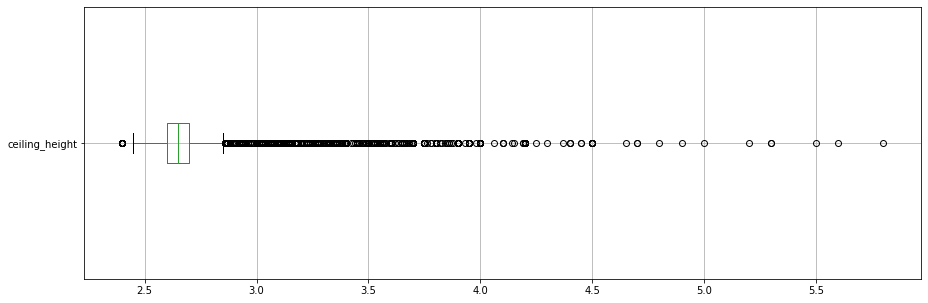

In [21]:
column_report('ceiling_height')

Стало гораздо правдоподобнее. Посмотри теперь на расстояние к ближайшим аэропортам:

Nan % 23.347980395470678
count    18142.000000
mean     28794.033789
std      12633.049788
min          0.000000
25%      18582.750000
50%      26726.000000
75%      37276.500000
max      84869.000000
Name: airports_nearest, dtype: float64


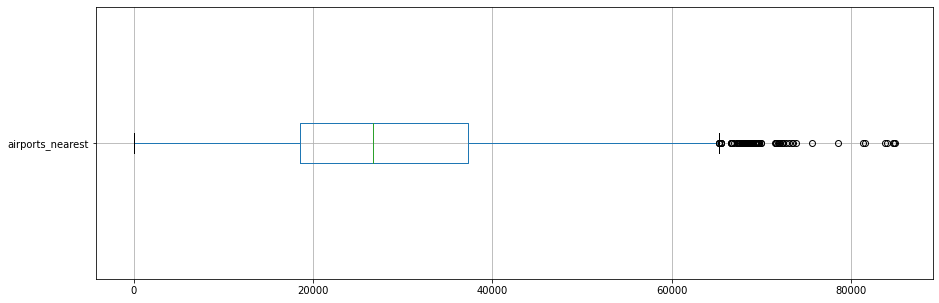

In [22]:
# airports_nearest
column_report('airports_nearest')

23% пропусков, оставим как есть, возможно аэропорто рядом и нет

Поссмотрим на расстояние до центра города:

Nan % 23.250802771674834
count    18165.000000
mean     14191.270906
std       8610.075224
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


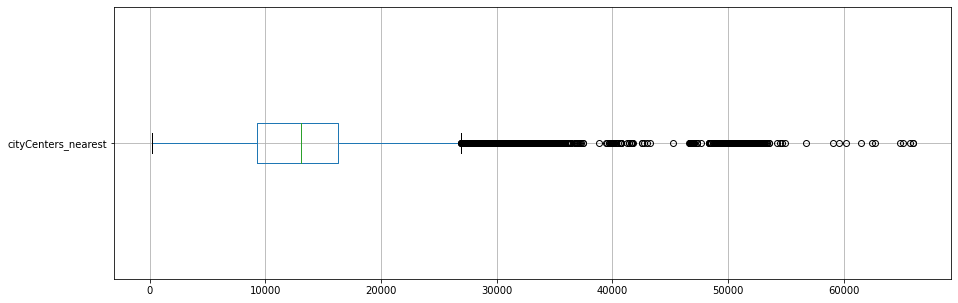

In [23]:
# cityCenters_nearest
column_report('cityCenters_nearest')

Почти 23% пропусков, оставим как есть.

Посмотрим на колличество близлежащих водоемов:

Nan % 23.246577657596756
count    18166.000000
mean         0.770065
std          0.938240
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


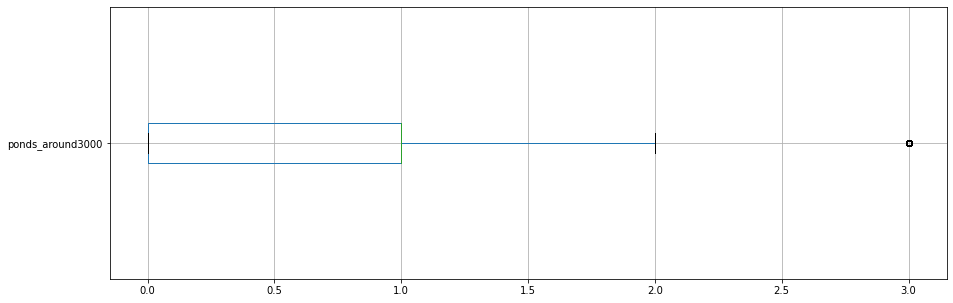

In [24]:
# ponds_around3000
column_report('ponds_around3000')

Предположим, что если данных не указано то и водоемов тоже нет - заполним пропуски на 0. Также колличество водоемов скорее всего должно быть целым числом, тк половины пруда быть не может - преобразуем тип в целый:

Nan % 0.0
count    23668.000000
mean         0.591051
std          0.884002
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


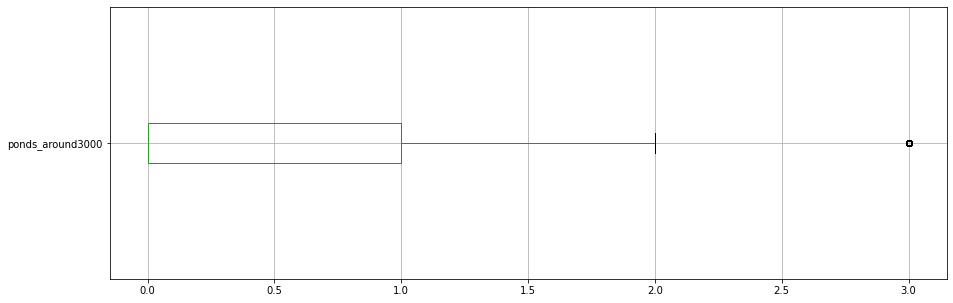

In [25]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
column_report('ponds_around3000')

Чтож видов на воду продается не так много судя по всему. Посмотрим что с парками:

Nan % 23.246577657596756
count    18166.000000
mean         0.611197
std          0.801968
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


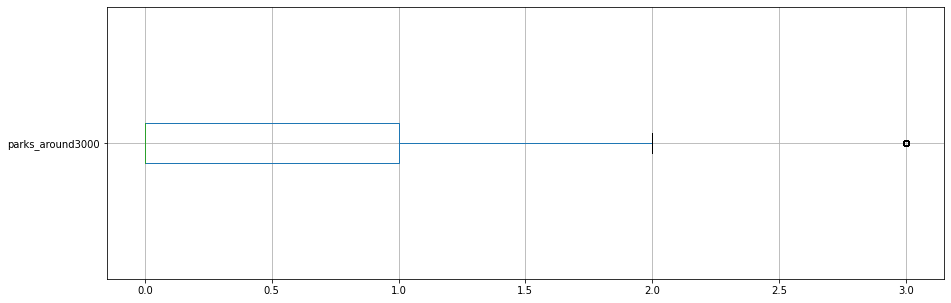

In [26]:
# parks_around3000
column_report('parks_around3000')

С парками поступим по аналогии с водоемами:

Nan % 0.0
count    23668.000000
mean         0.469114
std          0.748526
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


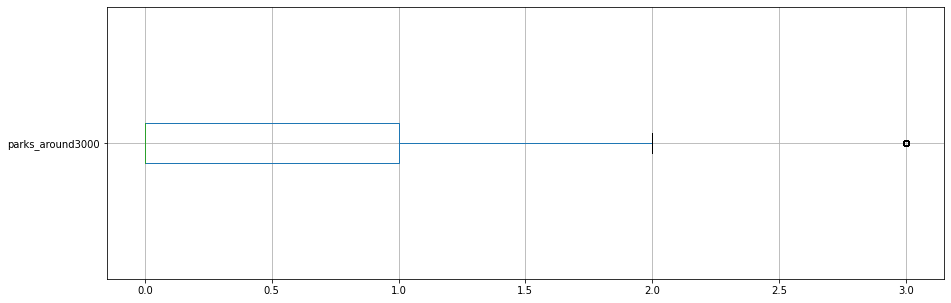

In [27]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
column_report('parks_around3000')

Парков вблизи также не много, как и водоемов. Перейдем к колличеству дней активности объявления:

Nan % 13.423187426060505
count    20491.000000
mean       180.930506
std        219.812175
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


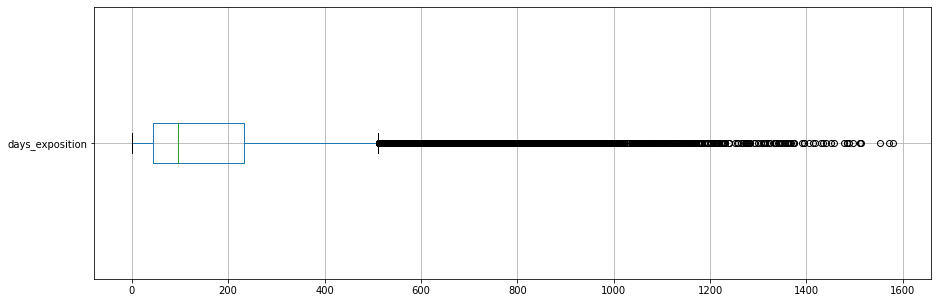

In [28]:
# days_exposition
column_report('days_exposition')

13% пропусков, скорее всего квартиры в таких объявлениях еще не проданы, поэтому оставим пропуски и преобразуем тип данных в целый для дальнейшего удобства подсчета дней:

In [29]:
data.loc[data['days_exposition'].notna(),'days_exposition'] = data.loc[
    data['days_exposition'].notna(),'days_exposition'].astype(int)

Посмотрим на общую площадь помещений:

Nan % 0.0
count    23668.000000
mean        60.357979
std         35.660998
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


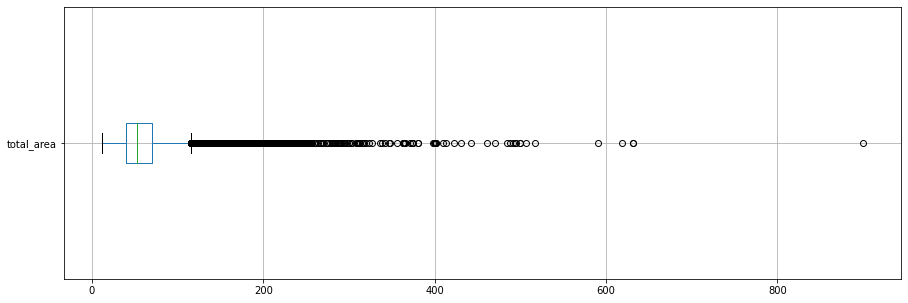

In [30]:
# total_area
column_report('total_area')

Среднее и медиана отличаются всего на 8м, конечно площади под 900м смущают но их мало. Проверим ка дела с жилой площадью:

Nan % 8.027716748352205
count    21768.000000
mean        34.459006
std         22.025657
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


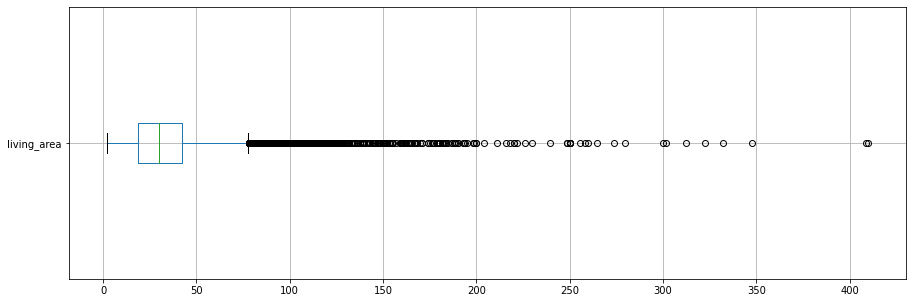

In [31]:
# living_area
column_report('living_area')

8% пропусков заполним разделив общую площадь на коэффициент отношения среднего общей площади к среднему жилой площади:

Nan % 0.0
count    23668.000000
mean        34.596377
std         22.351424
min          2.000000
25%         19.000000
50%         30.000000
75%         42.108299
max        409.700000
Name: living_area, dtype: float64


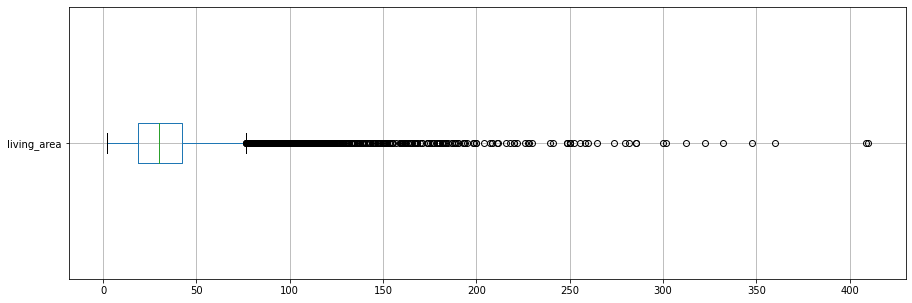

In [32]:
data['living_area'] =  data['living_area'].fillna( data['total_area']/ (data['total_area'].mean() /data['living_area'].mean(skipna=True)))
column_report('living_area')

Минимальной жилой площадью на человека считается 18 квадратных метров, указанный минимум в 2 метра напоминает чулан под лестницей. Проверим сколько таких маленьких жилых помещений:

In [33]:
anomaly_living_area = data.loc[(data['living_area']<18),'living_area']
print(anomaly_living_area.count())

4258


Чтож, видимо чуланы продаются и покупаются. Посмотрим на площади кухонь:

Nan % 9.603684299476086
count    21395.000000
mean        10.572377
std          5.907703
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


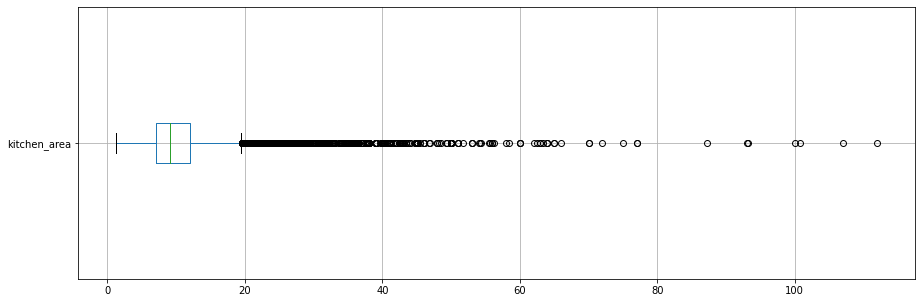

In [34]:
# kitchen_area
column_report('kitchen_area')

9% пропусков заполним разделив жилую площадь на коэффициент отношения среднего жилой площади к среднему кухонной площади:

Nan % 0.0
count    23668.000000
mean        10.527495
std          6.067054
min          0.611184
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


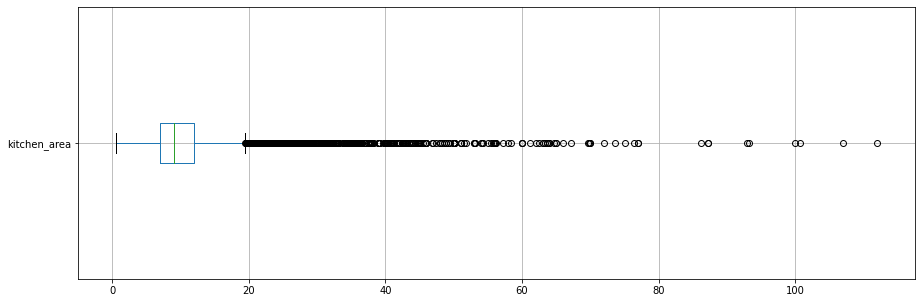

In [35]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['living_area']
                                                   /(data['living_area'].mean()/data['kitchen_area'].mean(skipna=True)))
column_report('kitchen_area')

Кухонь может и не быть поэтому минимум в 0м допустим. Аномально большие кухни скорее всего указаны с учетом столовых, среднее и медиана разнятся всего на пару метров, так что выбросы допустимы. 

Проверим общее колличество этажей:

Nan % 0.3633598107148893
count    23582.000000
mean        10.675303
std          6.596107
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


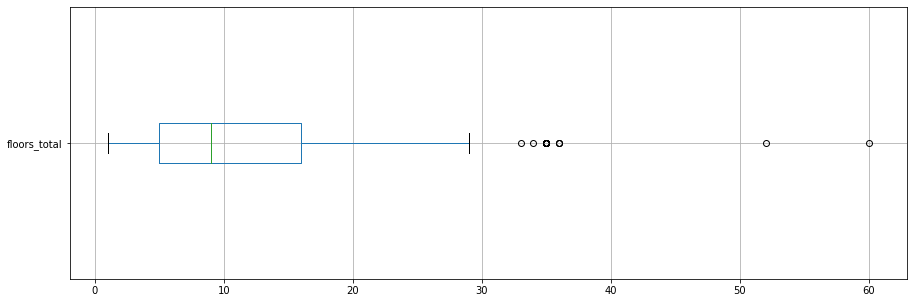

In [36]:
column_report('floors_total')

Есть немного пропусков, заполним общее колличество этажей этажом продаваемого объекта:

Nan % 0.0
count    23668.000000
mean        10.672934
std          6.594738
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


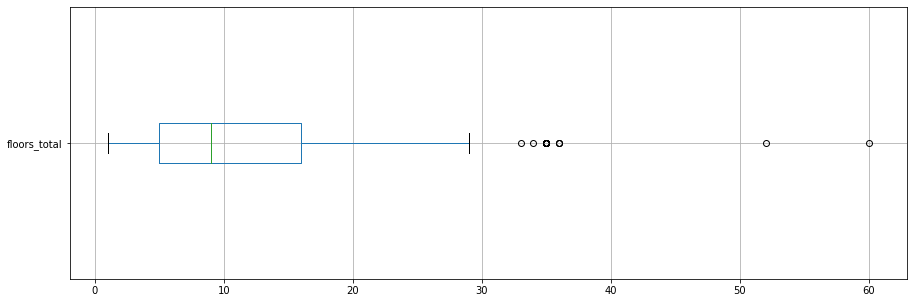

In [37]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
column_report('floors_total')

Согласно гуглу выше 35 этажа жилых помещений в Санкт-Питербурге нет, так что проверим все что выше и уберем:

5
Nan % 0.0
count    23663.000000
mean        10.665892
std          6.575969
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64


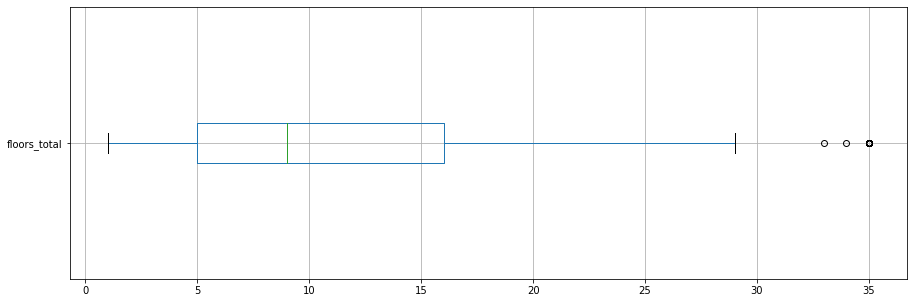

In [38]:
anomaly_floors_total = data.loc[(data['floors_total']>35),'floors_total']
print(anomaly_floors_total.count())
data.drop(anomaly_floors_total.index, inplace=True)
column_report('floors_total')

Проверим и преобразуем столбец с названиями населенных пунктов:

In [39]:
# column_report('locality_name')
column_report('locality_name',False)
data['locality_name'].isna().sum()

Nan % 0.20707433546042342
count               23614
unique                364
top       Санкт-Петербург
freq                15704
Name: locality_name, dtype: object


49

Всего 49 строк без указания населенного пункта, уберем их:

In [40]:
anomaly_locality_name = data.loc[data['locality_name'].isna()]
data.drop(anomaly_locality_name.index, inplace=True)

Проверим уникальные названия населенных пунктов:

In [41]:
print(data['locality_name'].unique())
data['locality_name'].value_counts()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' '

Санкт-Петербург         15704
посёлок Мурино            522
посёлок Шушары            440
Всеволожск                397
Пушкин                    369
                        ...  
поселок Усть-Луга           1
посёлок Плоское             1
поселок Гаврилово           1
поселок Севастьяново        1
деревня Шпаньково           1
Name: locality_name, Length: 364, dtype: int64

Создадим новый столбец с названиями, в котором заменим буквы ё на е и оставим только названия с заглавной буквы, так нам удастся избежать неявных дубликатов:

In [42]:
#создадим функцию для устранения неявных дубликатов в названиях оставляя только название с заглавной буквы
def zaglav(gname):
    try:
        for i in range(len(gname)):
            if gname[i].isupper() == True:
                return gname[i:len(gname)]
    except:
        return 'error'

In [43]:
#создадим новый столбец с заглавным названием населенного пункта
data['ln_zaglav_name'] = data['locality_name'].str.replace('ё','е').apply(zaglav)

# проверим значения нового столбца с названиями
data['ln_zaglav_name'].value_counts()

Санкт-Петербург            15704
Мурино                       590
Кудрово                      471
Шушары                       440
Всеволожск                   397
                           ...  
Пельгора                       1
Платформа 69-й километр        1
Жилпоселок                     1
Корнево                        1
Хапо-Ое                        1
Name: ln_zaglav_name, Length: 305, dtype: int64

Уникальных названий было 364, а стало 305 - это на 59 меньше. Посмотрим теперь на новый столбец с названиями:

In [44]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ln_zaglav_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.774776,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург


Проверим столбец с колличеством прикрепленных к объявлению фотографий:

Nan % 0.0
count    23614.000000
mean         9.862454
std          5.680921
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


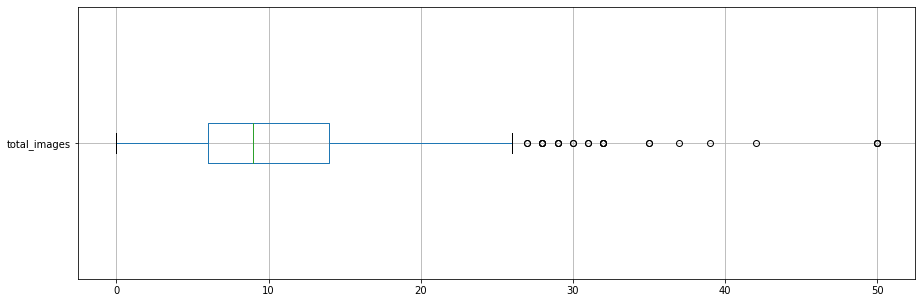

In [45]:
# total_images
column_report('total_images')

Пропусков нет, среднее и медиана почти одинаковы и точ то где-то есть по 50 фоток не страшно. посмотрим на столбец с ценами:

Nan % 0.0
count    2.361400e+04
mean     6.539625e+06
std      1.087915e+07
min      1.219000e+04
25%      3.405250e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


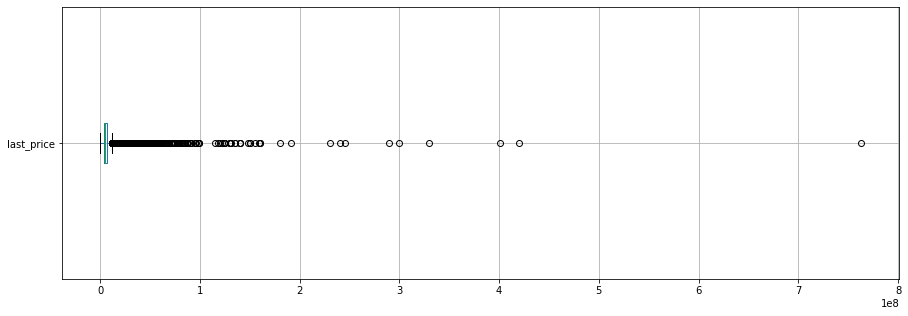

In [46]:
# last_price 
column_report('last_price') 

Так как цены не маленькие, то выводятся в экспонециальной форме что не очень информативно.

Посмотрим на данные по студиям и изменим тип на логический, тк либо студия либо нет:

Nan % 0.0
count     23614
unique        2
top       False
freq      23465
Name: studio, dtype: object


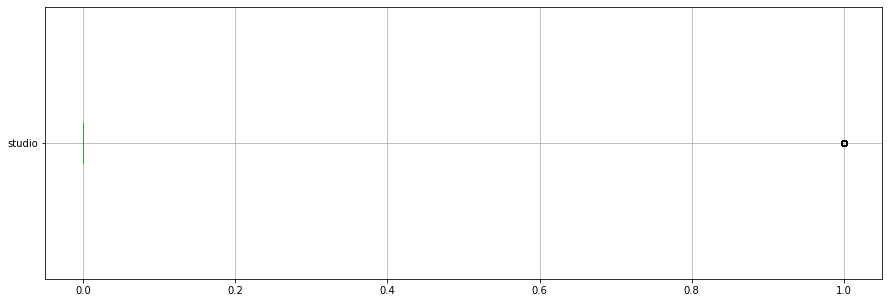

In [47]:
# studio
column_report('studio')
data['studio'] = data['studio'].astype('bool')

Проверим данные по этажам:

Nan % 0.0
count    23614.000000
mean         5.891209
std          4.879271
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


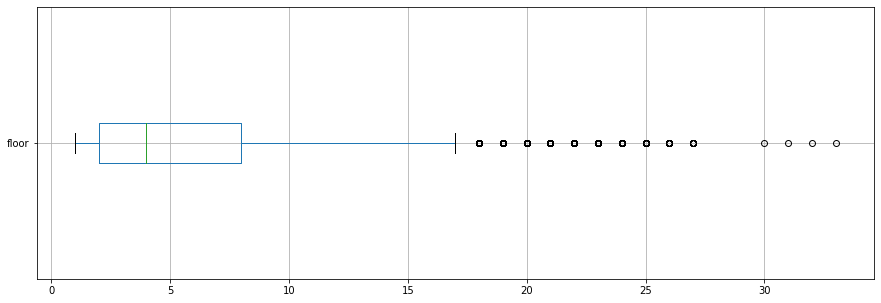

In [48]:
# floor
column_report('floor')

Этажи в порядке. Проверим комнаты:

Nan % 0.0
count    23614.00000
mean         2.07034
std          1.07894
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         19.00000
Name: rooms, dtype: float64


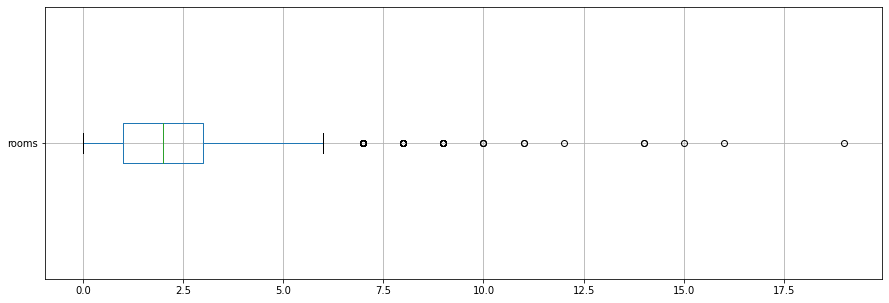

In [49]:
# rooms
column_report('rooms')

Среднее и медиана почти сошлись, так что выбросы в 19 комнат нам не мешают. Далее идет столбец с первым днем объявления, в нем мы преобразуем тип данных для дальнейших подсчетов:

In [50]:
# first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Проверим данные о планировке:

Nan % 0.0
count     23614
unique        2
top       False
freq      23547
Name: open_plan, dtype: object


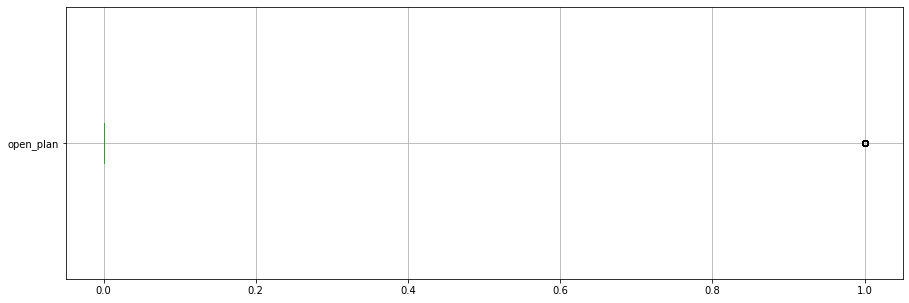

In [51]:
# open_plan
column_report('open_plan')

В данных о планах объектов аномалий нет.

**Вывод:** Прошлись по всем столбцам. Обработали пропуски и аномалии где это возможно, устранили неявные дубликаты в названии локаций. Можно переходить к созданию дополнительных столбцов, которые будут необходимы в дальнейшем анализе.

## Расчитаем и добавим в таблицу новые столбцы

### Столбец с ценой за 1кв метр

In [52]:
data['cena_za_metr'] = (data['last_price'] / data['total_area']).astype('int')

### Столбец с днем недели

In [53]:
data['week_day'] = data['first_day_exposition'].dt.weekday

### Столбец с месяцем

In [54]:
data['month'] = data['first_day_exposition'].dt.month

### Столбец с годом

In [55]:
data['year'] = data['first_day_exposition'].dt.year

### Столбец с этажностью объекта

Для определения этажа напишем функцию:

In [56]:
#функция по этажам
def floor_cat(r):
    if r['floor'] == 1:
        return 'первый'
    elif r['floor'] == r['floors_total']:
        return 'последний'
    elif 1 < r['floor'] < r['floors_total']:
        return 'другой'

Создаем столбец этажности с помощью функции и apply: 

In [57]:
data['floor_cat'] = data.apply(floor_cat, axis = 1)

### Столбец с расстоянием до центра города в км

In [58]:
data['cC_near_km'] = round(data['cityCenters_nearest'] / 1000)

Посмотрим на новые столбцы:

In [59]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ln_zaglav_name,cena_za_metr,week_day,month,year,floor_cat,cC_near_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2,755.0,NaN,Санкт-Петербург,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,0,NaN,81.0,Шушары,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,2,574.0,558.0,Санкт-Петербург,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.774776,9,True,...,3,234.0,424.0,Санкт-Петербург,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1,48.0,121.0,Санкт-Петербург,100000,1,6,2018,другой,8.0


**Вывод:** 
- Создали столбец с ценой объектов за 1квадратный метр. 
- Создали столбцы с днем, месяцем и годом объявлений. 
- Создали столбец с типом эатажа каждого объекта.
- Создали столбец с расстоянием от объекта до центра города в км.

## Проведим исследовательский анализ данных

### Изучим  параметры объектов:

#### Общая площадь:

count    23614.000000
mean        60.338696
std         35.671770
min         12.000000
25%         40.000000
50%         52.000000
75%         69.787500
max        900.000000
Name: total_area, dtype: float64

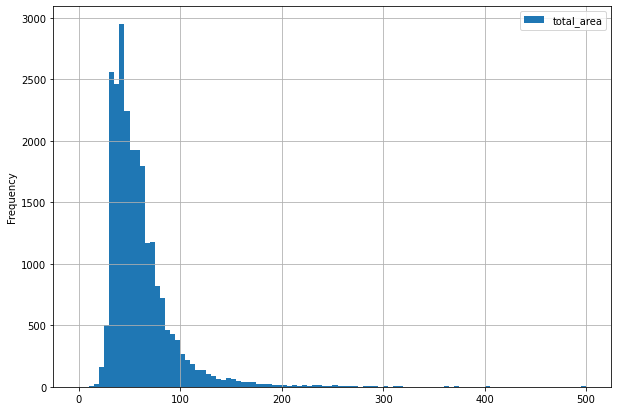

In [60]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,7), range = (0,500))
data['total_area'].describe()

По гистограмме общей площади данные распределены нормально, присутсвуют выбросы, которые не сильно влияют на данные. 
Средняя площадь продаваемых объектов 60 квадратных метров, минимальное значение 12 кв м, а максимальное 900 кв м.

#### Жилая площадь:

count    23614.000000
mean        34.585951
std         22.357881
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

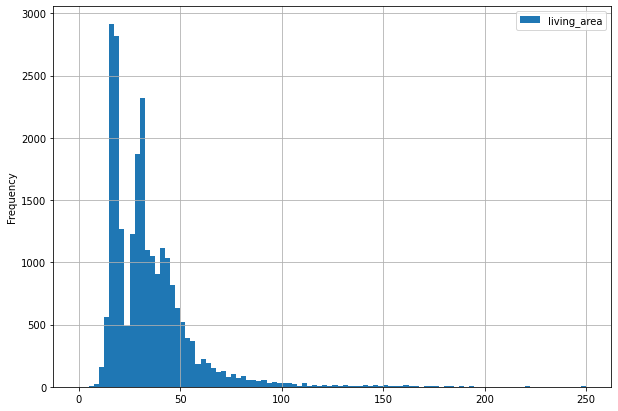

In [61]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,7), range = (0,250))
data['living_area'].describe()

По гистограмме жилой площади данные распределены нормально, присутсвует выбросы, которые не сильно влияют на данные.
Средняя жилая площадь продаваемых объектов 34 квадратных метра, минимальное значение 2 кв м, а максимальное 409 кв м.

#### Площадь кухни:

count    23614.000000
mean        10.523487
std          6.064738
min          0.611184
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

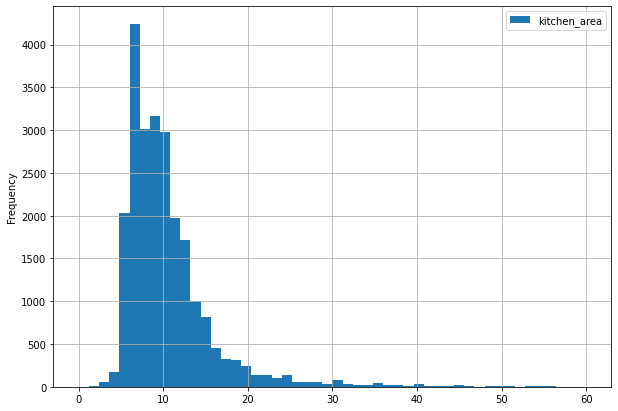

In [62]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (10,7), range = (0,60))
data['kitchen_area'].describe()

По гистограмме площади кухни данные распределены нормально, присутсвует выбросы, которые не сильно влияют на данные.
Средняя площадь кухонь у продаваемых объектов 11 квадратных метров, минимальное значение 0 кв м, а максимальное 230 кв м.

#### Цена объектов:

count    2.361400e+04
mean     6.539625e+06
std      1.087915e+07
min      1.219000e+04
25%      3.405250e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

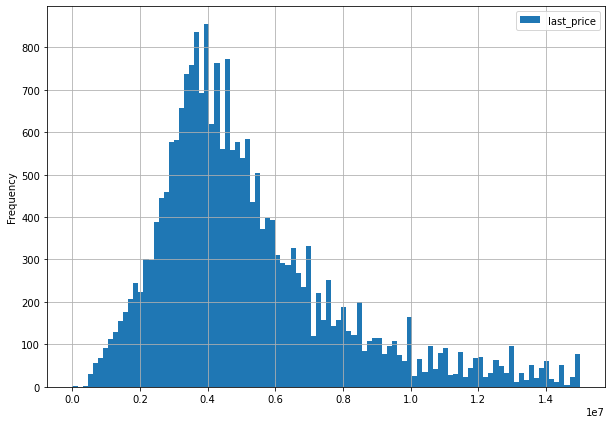

In [63]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (10,7))
data['last_price'].describe()

С данными по цене все нормально, но на графике данные выводятся в экспоненциальной форме.

#### Количество комнат:

count    23614.00000
mean         2.07034
std          1.07894
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         19.00000
Name: rooms, dtype: float64

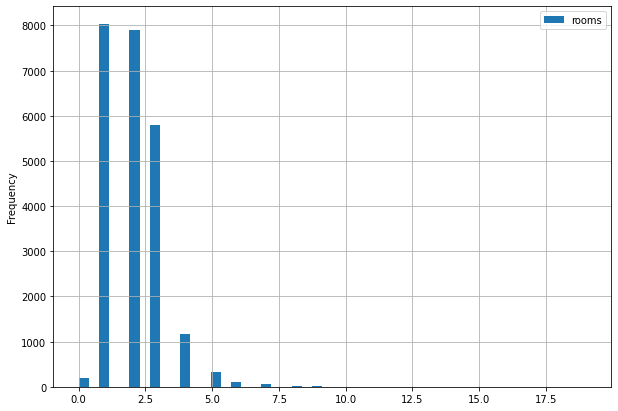

In [64]:
data.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (10,7))
data['rooms'].describe()

Судя по данным - двухкомнатные объекты самые популярные.

#### Высота потолков:

count    23614.000000
mean         2.697128
std          0.219470
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

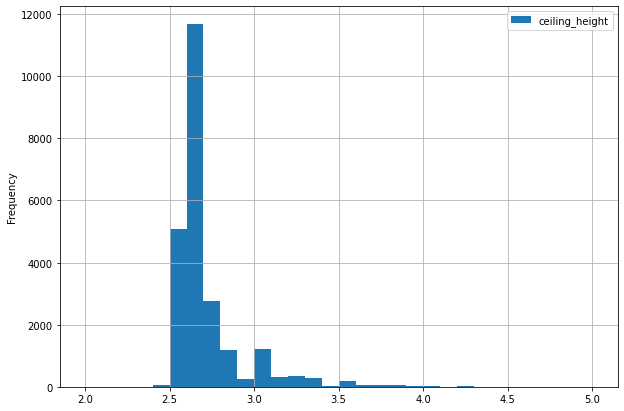

In [65]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (10,7))
data['ceiling_height'].describe()

С данными все в порядке.

#### Этажность объектов:

count    23614.000000
mean         5.891209
std          4.879271
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

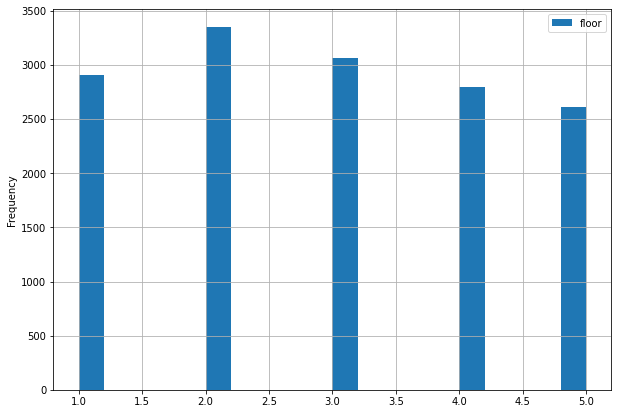

In [66]:
data.plot(y = 'floor', kind = 'hist', bins = 20, range = (1,5), grid=True, figsize = (10,7))
data['floor'].describe()

Чаще всего продаются объекты на 2м этаже.

#### Тип этажа объектов:

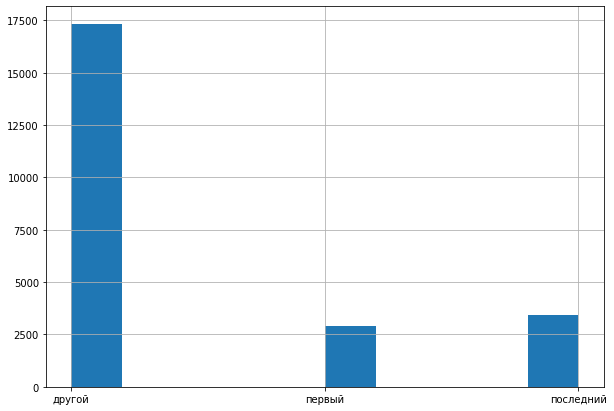

In [67]:
data['floor_cat'].hist(grid=True, figsize = (10,7));

Первые этажи продаются чуть меньше последних, а все остальные этажи чаще всего.

#### Общее количество этажей объектов:

count    23614.000000
mean        10.668205
std          6.573572
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

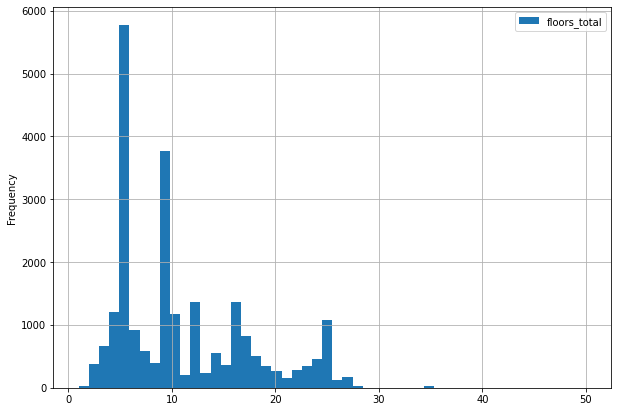

In [68]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, range = (1,50), grid=True, figsize = (10,7))
data['floors_total'].describe()

Минимальный этаж в объявлениях 1й, максимальный 35й. В среднем чаще продают 9 и 10е этажи.

#### Расстояние до центра города в метрах:

count    18119.000000
mean     14194.944699
std       8605.336492
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

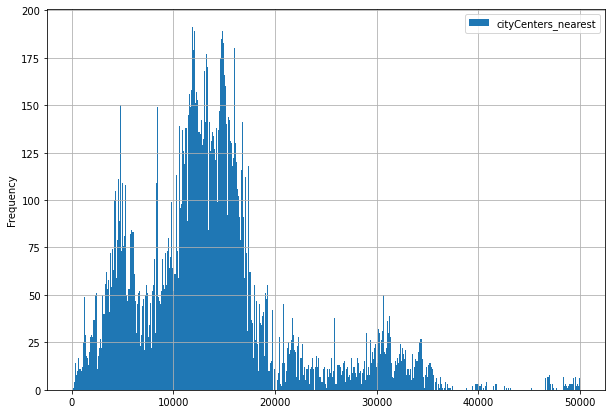

In [69]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 500, range = (100,50000), grid=True, figsize = (10,7))
data['cityCenters_nearest'].describe()

Минимальное растояние до центра грода 181м, максимальное 65968м. Среднее = 14194, а медиана = 13105.

#### Расстояние до ближайшего аэропорта:

count    18096.00000
mean     28803.55924
std      12637.11214
min          0.00000
25%      18574.00000
50%      26756.50000
75%      37310.00000
max      84869.00000
Name: airports_nearest, dtype: float64

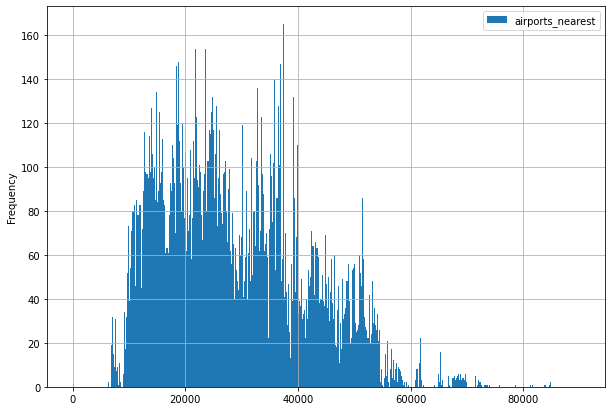

In [70]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 500, range = (0,90000), grid=True, figsize = (10,7))
data['airports_nearest'].describe()

Минимальное растояние до аэропорта 0м, максимальное 84869м. Среднее = 28803м и медиана = 26756м.

#### Расстояние до ближайшего парка:

count    8053.000000
mean      490.775736
std       342.695089
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

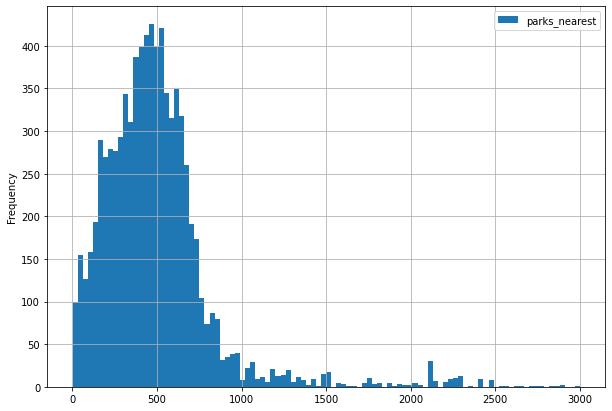

In [71]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, range = (1,3000), grid=True, figsize = (10,7))
data['parks_nearest'].describe()

Минимальное растояние до парка 1м, максимальное 3190м. Среднее = 490м и медиана = 454м.

#### День публикации объявления:

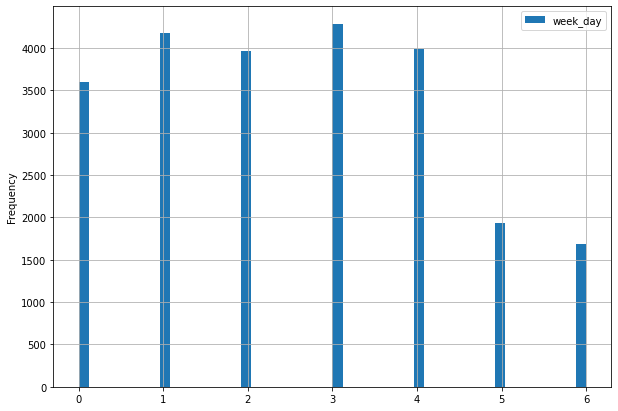

In [72]:
data.plot(y = 'week_day', kind = 'hist', bins = 50, range = (0,6), grid=True, figsize = (10,7));

Четверг и вторник самые популярные дни публикаций объявлений, а суббота и воскресенье менее популярны - всетаки выходные ;)

#### Месяц публикации объявления:

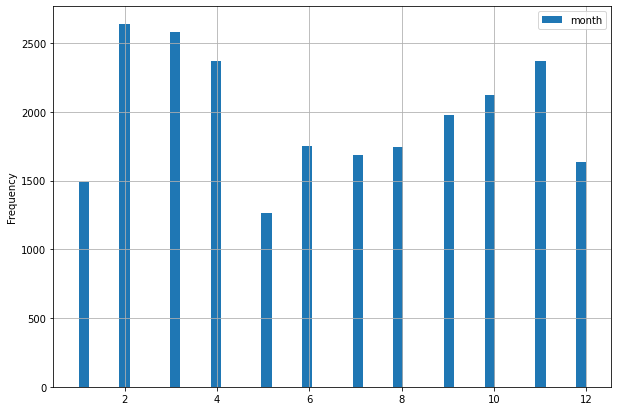

In [73]:
data.plot(y = 'month', kind = 'hist', bins = 50, range = (1,12), grid=True, figsize = (10,7));

В феврале объявлений появляется больше, к весне наблюдается спад активности, затем скачок летом и плавный рост осенью.

### Изучим, как быстро продавались квартиры.

Построим гистограмму и проверим среднее и медиану по столбцу days_exposition. Этот параметр показывает, сколько дней было размещено каждое объявление.

count    20439.000000
mean       180.817653
std        219.876333
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

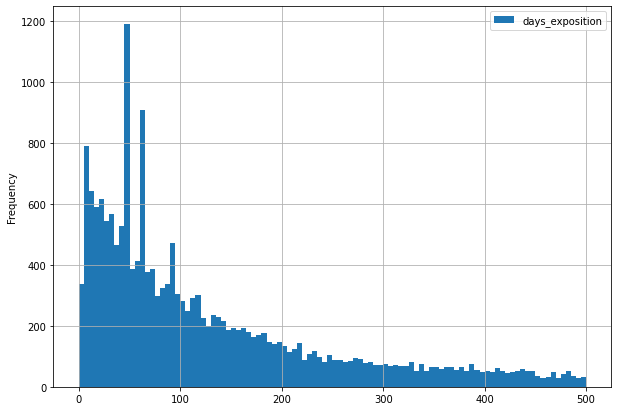

In [74]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (0,500), grid=True, figsize = (10,7))
data['days_exposition'].describe()

В среднем продажа занимает 180 дней, хотя есть и аномально быстрые продажи за 1 день. Необычно долгие продажи заняли почти 5 лет. Медианное значение 95 дней, что меньше среднего. На графике есть пики, скорее всего они соответсвуют автоматическому снятию объявления, которое указано в сервисе объявлений.

### Проверим какие факторы больше всего влияют на полную стоимость объекта. 

Для этого изучим зависимость цены от разных факторов:
- Зависимость цены от общей площади объекта
- Зависимость цены от жилой площади объекта
- Зависимость цены от площади кухни объекта
- Зависимость цены от кол-ва комнат объекта
- Зависимость цены от этажа объекта
- Зависимость цены от дня размещения объявления
- Зависимость цены от месяца размещения объявления
- Зависимость цены от года размещения объявления

#### Зависимость цены от общей площади объекта

,median
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
15.5,2450000.0
16.0,2100000.0
17.0,1700000.0
17.2,2050000.0


0.6538706226371375

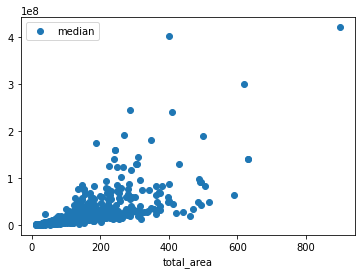

In [75]:
tab_tot_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
tab_tot_area.columns = ['median']
tab_tot_area.plot(y = 'median', style = 'o')
tab_tot_area.sort_values('median', ascending = False)
display(tab_tot_area.head(10))
data['total_area'].corr(data['last_price'])

Коэффициент корреляции 0.65, а значит зависимость цены от площади объекта есть. Чем больше площадь объекта, тем больше стоимость, что логично и соответсвует действительности.

#### Зависимость цены от жилой площади объекта

,median
living_area,
2.000000,4340000.0
3.000000,34715000.0
5.000000,2680000.0
5.400000,6100000.0
6.000000,3799000.0
6.500000,4050000.0
7.421837,1625000.0
7.536019,1686000.0
8.000000,6850000.0


0.5853444945937482

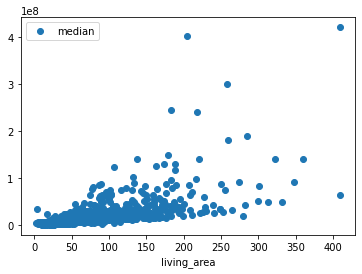

In [76]:
tab_liv_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
tab_liv_area.columns = ['median']
tab_liv_area.plot(y = 'median', style = 'o')
tab_liv_area.sort_values('median', ascending = False)
display(tab_liv_area.head(10))
data['living_area'].corr(data['last_price'])

Коэффициент корреляции 0.58, а значит зависимость цены от жилой площади объекта тоже есть. Чем больше жилая площадь объекта, тем больше стоимость.

#### Зависимость цены от площади кухни объекта

,median
kitchen_area,
0.611184,2330000.0
1.300000,4250000.0
1.527960,2680000.0
2.000000,2720000.0
2.268054,1625000.0
2.300000,2940000.0
2.302947,1686000.0
2.400000,2200000.0
2.616986,1725000.0


0.517702418762686

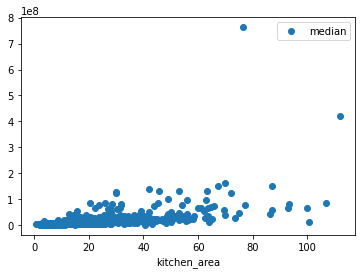

In [77]:
tab_kit_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
tab_kit_area.columns = ['median']
tab_kit_area.plot(y = 'median', style = 'o')
tab_kit_area.sort_values('median', ascending = False)
display(tab_kit_area.head(10))
data['kitchen_area'].corr(data['last_price'])

Коэффициент корреляции 0.44, а значит зависимость цены от площади кухни объекта также есть. Чем больше площадь кухни объекта, тем больше стоимость.

#### Зависимость цены от кол-ва комнат объекта

,count,median
rooms,,
0,197,2700000.0
1,8023,3600000.0
2,7910,4770169.0
3,5789,6200000.0
4,1174,9000000.0
5,326,14000000.0
6,105,19000000.0
7,59,24900000.0
8,12,23095000.0


0.3635792435592322

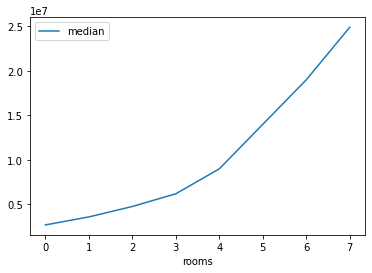

In [78]:
tab_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'median'])
tab_rooms.columns = ['count', 'median']
tab_rooms.query('count > 50').plot(y = 'median')
tab_rooms.query('count > 50').sort_values('median', ascending = False)
display(tab_rooms.head(10))
data['rooms'].corr(data['last_price'])

Коэффициент корреляции 0.36, а значит небольшая зависимость цены от количества комнат объекта все же есть. Чем больше комнат, тем немного больше стоимость.

#### Зависимость цены от этажа объекта

,median
floor_cat,
другой,4850000.0
первый,3900000.0
последний,4350000.0


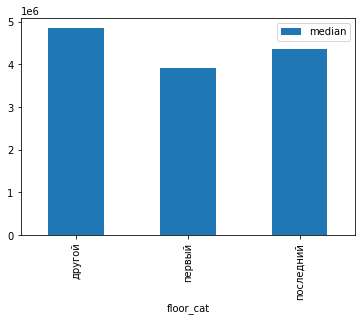

In [79]:
tab_floor_cat = data.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['median'])
tab_floor_cat.columns = ['median']
tab_floor_cat.plot.bar(y = 'median')
display(tab_floor_cat)

Квартиры на промежуточных этажах дороже чем на первом и последнем. Первые этажи дешевле последних - это факт, тк пентхаусы и видовые этажи стоят дороже.

#### Зависимость цены от дня размещения объявления

,median
week_day,
0,4650000.0
1,4714595.0
2,4700000.0
3,4650000.0
4,4575000.0
5,4567500.0
6,4550000.0


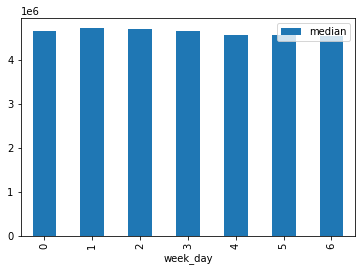

In [80]:
tab_day = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['median'])
tab_day.columns = ['median']
tab_day.plot.bar(y = 'median')
display(tab_day)

По вторникам цена самая высокая, а по выходным самая низкая. Возможно из-за того, что вторник и среда самае продуктивные дни недели, или люди устав от работы думают продать жилье подороже и отправится в долгий отпуск на вырученные деньги)

#### Зависимость цены от месяца размещения объявления

,median
month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4500000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


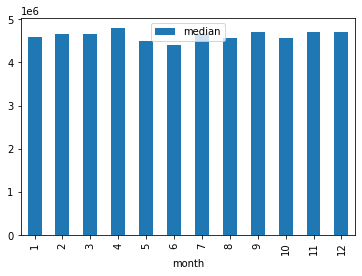

In [81]:
tab_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
tab_month.columns = ['median']
tab_month.plot.bar(y = 'median')
display(tab_month)

Самые высокие цены на жилье в апреле, а самые низкие в июне. Возможно это с вязано с желанием людей начать новую жизнь весной и началом сезона отпусков летом.


#### Зависимость цены от года размещения объявления

,median
year,
2014,7640000.0
2015,5337000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


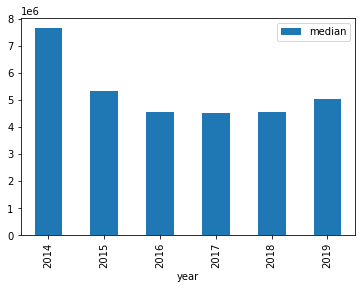

In [82]:
tab_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
tab_year.columns = ['median']
tab_year.plot.bar(y = 'median')
display(tab_year)

Налюдаем, что самые высокие цены были в 2014 году, а потом Крым наш и куча санкций цены начали резко падать, но с 2017 года наблюдается очередной рост. Надолго ли?)

### Расчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные мы найдем по имени в новом столбце ln_zaglav_name(созданный столбец без неявных дубликатов).

In [83]:
#Средняя цена за кв м в 10 населённых пунктах с наибольшим числом объявлений
loc_tab = data.pivot_table(index = 'ln_zaglav_name', values = 'cena_za_metr', aggfunc=['count', 'mean'])
loc_tab.columns = ['count', 'mean']
loc_tab = loc_tab.sort_values('count', ascending = False).head(10)
display(loc_tab)
#самая высокая цена за кв м
display(loc_tab[loc_tab['mean']==loc_tab['mean'].max()])
#самая низкая цена за кв м
display(loc_tab[loc_tab['mean']==loc_tab['mean'].min()])

,count,mean
ln_zaglav_name,,
Санкт-Петербург,15704,114794.780884
Мурино,590,86087.055932
Кудрово,471,95325.726115
Шушары,440,78676.904545
Всеволожск,397,68718.853904
Пушкин,369,103125.373984
Колпино,338,75424.150888
Парголово,327,90175.489297
Гатчина,307,68745.693811


,count,mean
ln_zaglav_name,,
Санкт-Петербург,15704,114794.780884


,count,mean
ln_zaglav_name,,
Выборг,235,58237.723404


Самая высокая цена за квадратный метр и большее количество объявлений в Санкт-Петербурге, что ожидаемо, так как мы анализируем недвижемость в Санкт-Петербурге. Самая низкая стоимость среди 10ки пунктов с наибольшим колличеством объявлений в Выборге. 

### Рассмотрим стоимость объектов по удаленности от центра города.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца ln_zaglav_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

,cena_za_metr
cC_near_km,
1.0,177004.963542
2.0,157848.564516
3.0,121386.991429
4.0,133282.422965
5.0,140509.339130
6.0,150228.418152
7.0,156176.445238
8.0,124850.937815
9.0,113130.595278


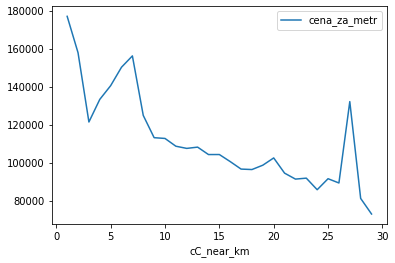

In [84]:
tab_km = data.query('ln_zaglav_name == "Санкт-Петербург" and cC_near_km !=0').pivot_table(index = 'cC_near_km', values = 'cena_za_metr', aggfunc = 'mean')
tab_km.plot()
display(tab_km)

Самая дорогая стоимость квадратного метра всего в 1 километре от центра, чуть дальше наблюдается спад - возможно из-за того что пешком уже до центра не прогуляешься туда и обратно)) С 4 до 7 км наблюдается рост цены, которая затем снижается. Отсюда можно предположить что самый центр радиус в 7 км. На графике также виден резкий пик в районе 27км, возможно элитные загородные домики)) 

## Общий вывод

В нашем распоряжении были данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Обработав пропуски, аномалии и неточности мы приступили к анализу. Что удалось обнаружить:

- Средняя площадь продаваемых объектов 60 квадратных метров.
- Средняя жилая площадь продаваемых объектов 34 квадратных метра.
- Средняя площадь кухонь у продаваемых объектов 11 квадратных метров.
- Двухкомнатные объекты самые популярные.
- Чаще всего продаются объекты на 2м этаже.
- Первые этажи продаются чуть меньше последних, а все остальные этажи чаще всего.
- В среднем чаще продают 9 и 10е этажи.
- Чаще продают достаточно удаленные от центра и аэропорта квартиры(среднее = 13939м и 28319м, соответветственно).
- Парковая зона чаще расположена довольно близко среднее = 467м.
- Четверг и вторник самые популярные дни публикаций объявлений, а суббота и воскресенье менее популярны.
- В феврале объявлений появляется больше, к весне наблюдается спад активности, затем скачок летом и плавный рост осенью.
- В среднем продажа занимает 180 дней, хотя есть и аномально быстрые продажи за 1 день. Необычно долгие продажи заняли почти 5 лет.
Зависимости полной стоимости:
- Чем больше площадь объекта, тем больше стоимость.
- Чем больше жилая площадь объекта, тем больше стоимость.
- Чем больше площадь кухни объекта, тем больше стоимость.
- Чем больше комнат, тем немного больше стоимость.
- Квартиры на нижних этажах дешевле, чем на верхних.
- По вторникам цена самая высокая, а по выходным самая низкая.
- Самые высокие цены на жилье в апреле, а самые низкие в июне.
- Самые высокие цены были в 2014 году, с 2017 года наблюдается очередной рост.
- Самая высокая цена за квадратный метр и большее количество объявлений в Санкт-Петербурге
- Самая низкая стоимость среди 10ки пунктов с наибольшим колличеством объявлений в Выборге.
- Выявили предпологаемый радиус центра города в 7 км.

Для определения рыночной стоимости объектов недвижимости с помощью автоматизированной системы, рекомендуется выбрать следующие параметры:
- Площадь объекта;
- Жилая площадь объекта;
- Площадь кухни объекта;
- Кол-во комнат объекта;
- Этаж объекта;
- Расположение относительно центра города;
- Расположение относительно ближайших парков.